In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\bapti\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
with open('CSV_Creation/OECD_countries_data.csv') as f:
    overall_data_by_country = pd.read_csv(f, error_bad_lines=False)

#we want to predict Death_rate by using countries' features 
features = list(overall_data_by_country.columns)
features.remove('Death_rate')
features.remove('Country')
overall_data_by_country = overall_data_by_country.set_index('Country')

#countries are classified according their death rate. Countries with the label 'True' means 
#that these countries have a high mortality rate compare to other countries

def classify_countries(threshold, overall_data_by_country):
    death_rate_class = []
    for i in range(overall_data_by_country.shape[0]):
        if overall_data_by_country.values[i,0] > threshold:
            death_rate_class.append(True)
        else:
            death_rate_class.append(False)
    return np.array(death_rate_class)

death_rate_class = classify_countries(8, overall_data_by_country) #the label (y)
other_data = overall_data_by_country[features].values #features to find the label (X)

In [3]:
#separating the data for training and testing 
train_death_rate, test_death_rate, train_other_data, test_other_data = train_test_split(death_rate_class, other_data, test_size=0.25)

Number of tests per confirmed cases    0.554198
Proportion of overweight people        0.241358
Proportion of edler people             0.204444
Hospital beds per 1000 hab             0.000000
Health employment per 1000 hab         0.000000
dtype: float64
Accuracy: 0.625


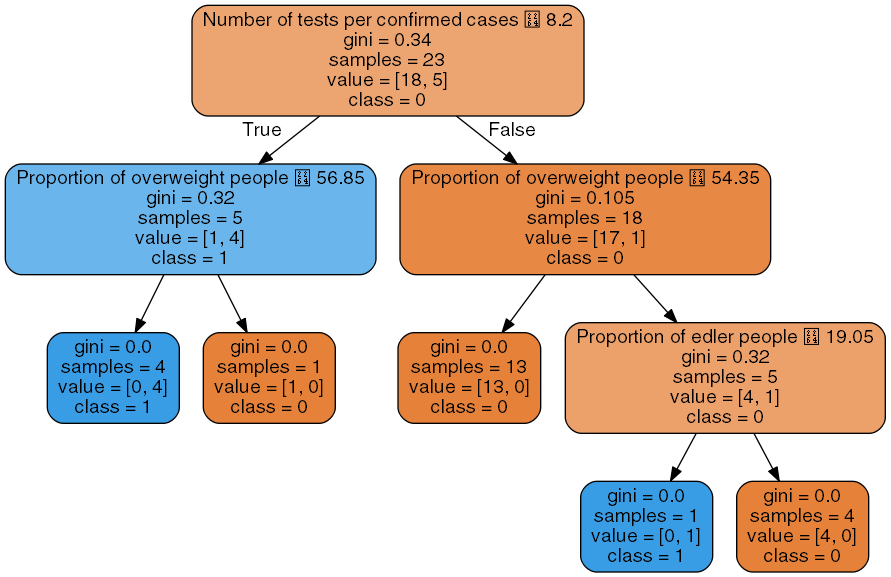

In [4]:
Dtc = DecisionTreeClassifier(criterion='gini')
Dtc.fit(train_other_data, train_death_rate)
pred_death_rate = Dtc.predict(test_other_data)
pred_train = Dtc.predict(train_other_data)

#contributions of the feature for classifying the data
feature_imp = pd.Series(Dtc.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
print('Accuracy:', metrics.accuracy_score(test_death_rate, pred_death_rate))

#the tree
dot_data = StringIO()
export_graphviz(Dtc, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [5]:
#tool to assess the model with the training dataset
print('Accuracy:', metrics.accuracy_score(train_death_rate, pred_train))
print('Precision:', metrics.precision_score(train_death_rate, pred_train))
print('Recall: ', metrics.recall_score(train_death_rate, pred_train))

Accuracy: 1.0
Precision: 1.0
Recall:  1.0


In [6]:
#tools to assess the model with the test dataset 
print('Accuracy:', metrics.accuracy_score(test_death_rate, pred_death_rate))
print('Precision:', metrics.precision_score(test_death_rate, pred_death_rate))
print('Recall: ', metrics.recall_score(test_death_rate, pred_death_rate))

Accuracy: 0.625
Precision: 0.3333333333333333
Recall:  0.5
